In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import re
import nltk
import spacy
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS #get_ipython().system('pip install wordcloud')

In [29]:
tweet_input = pd.read_csv("covid19_tweets.csv")
pd.options.mode.chained_assignment = None 

### Filter tweet by hashtag count>100

In [4]:
tweet= tweet_input['text']
def convert(lst):
    return ([i for item in lst for i in item.split()])
panda_df = pd.DataFrame(data =tweet_input, columns = ["text","hashtags"])
panda_df=panda_df[panda_df['hashtags'].notnull()]
df = pd.DataFrame(convert(panda_df['hashtags']))
df=df.replace(',','', regex=True)
df=df.replace("]",'', regex=True)
df=df.replace('\'','', regex=True)
df=df.replace('\[''', '', regex=True)
df.columns=['Words']
s=df.value_counts()
Words=pd.DataFrame(s.nlargest(155))
modified = Words.reset_index()
modified.columns=['Words',"Counts"]
#print(modified) ## Mention count above 100
selection = modified['Words'].tolist()
filtered_tweet=tweet_input[tweet_input['hashtags'].notnull()]
## Hashtags which contains these top 100 words
mask = filtered_tweet.hashtags.apply(lambda x: any(item for item in selection if item in x))
filtered_tweet=filtered_tweet[mask]

In [5]:
data = filtered_tweet[['user_name','date','text','hashtags']]
data

,user_name,date,text,hashtags
2,Time4fisticuffs,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19']
3,ethel mertz,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19']
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']"
5,🎹 Franz Schubert,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']"
6,hr bartender,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']"
...,...,...,...,...
179101,New Jersey Herald,2020-08-29 19:44:27,Wallkill school nurse adds COVID-19 monitoring...,"['nurses', 'COVID19', 'coronavirus', 'schools']"
179102,Pris,2020-08-29 19:44:23,"we have reached 25mil cases of #covid19, world...",['covid19']
179103,AJIMATI AbdulRahman O.,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask']
179104,Jason,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19']


In [30]:
tweet= data.loc[:,'text']
##remove website
tweet= tweet.str.replace(r'http://[^\s<>"]+|www\.[^\s<>"]+', "") ##Ref https://stackoverflow.com/questions/10475027/extracting-url-link-using-regular-expression-re-string-matching-python
##remove mentions and the word followed 
tweet = tweet.str.replace(r'\s*@\s\w+', '', regex=True)
#remove hashtags
tweet = tweet.str.replace(r'\W*#\W+', '', regex=True)
##remove punctuation
tweet = tweet.str.replace('[^\w\s]','')
##remove numbers
tweet = tweet.str.replace('\S*\d\S*', '')
##remove underscore
tweet = tweet.str.replace(r"\W+_\W+", '', regex=True)
tweet = tweet.str.replace(r"_", '', regex=True)
##remove brackets
tweet = tweet.str.replace('\[.*?\]', '')
##convert to lower case
tweet= tweet.str.lower()
##drop empty rows
tweet.dropna(inplace=True)
##remove leading and ending white space
tweet = tweet.str.strip()
data.loc[:,'text'] =tweet

C:\Users\User\AppData\Local\Temp/ipykernel_5624/516801912.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet= tweet.str.replace(r'http://[^\s<>"]+|www\.[^\s<>"]+', "") ##Ref https://stackoverflow.com/questions/10475027/extracting-url-link-using-regular-expression-re-string-matching-python
C:\Users\User\AppData\Local\Temp/ipykernel_5624/516801912.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet = tweet.str.replace('[^\w\s]','')
C:\Users\User\AppData\Local\Temp/ipykernel_5624/516801912.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet = tweet.str.replace('\S*\d\S*', '')
C:\Users\User\AppData\Local\Temp/ipykernel_5624/516801912.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet = tweet.str.replace('\[.*?\]', '')


### Sentiment Analyze using NLTK(nlp) 

In [9]:
# ref NLTK sentiment analyse https://www.nltk.org/howto/sentiment.html
sentiment_analyzer = SentimentIntensityAnalyzer()
scores=[]
sentiment_=[]
for i in data['text']:
    sentiment_score = sentiment_analyzer.polarity_scores(i)
    score = sentiment_score['compound']
    scores.append(score)
data=data.assign(sentiment_score = scores)
for i in data['sentiment_score']:
    if i>0:
        sentiment='positive'
    elif i==0:
        sentiment='neutral'
    else:
        sentiment='negative'
    sentiment_.append(sentiment)
data=data.assign(sentiments=sentiment_)

### WordCloud

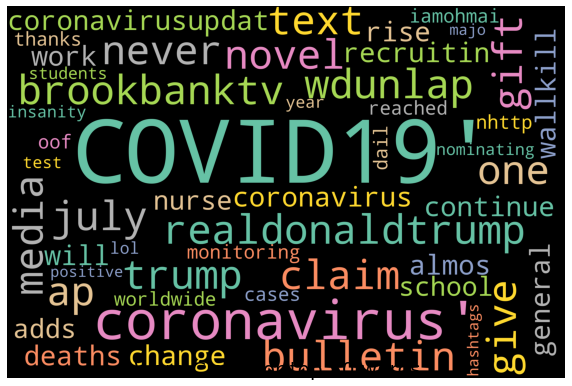

In [11]:
df_wordcloud=data[['text','hashtags']]
word_cloud = WordCloud(background_color='black',colormap='Set2',stopwords=set(STOPWORDS),max_words=50,width = 3000, height = 2000,random_state=1,collocations=False).generate(str(df_wordcloud))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for top 50 words', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

-0.8725


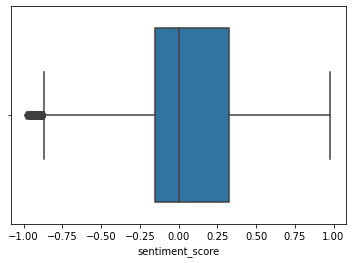

In [15]:
#use boxplot to check outlier
import seaborn as sns
sns.boxplot(x=data['sentiment_score']) 
Q1 = data['sentiment_score'].quantile(0.25)
Q3 = data['sentiment_score'].quantile(0.75)
IQR = Q3 - Q1
Lower_Fence = Q1 - (1.5 * IQR)
print(Lower_Fence)

#remove outlier
data=data.loc[data['sentiment_score']>= -0.8725]

fit.slope: -6.4749401707802105e-09
fit.intercept 10.37749938987173
fit.pvalue 6.424179546627426e-07


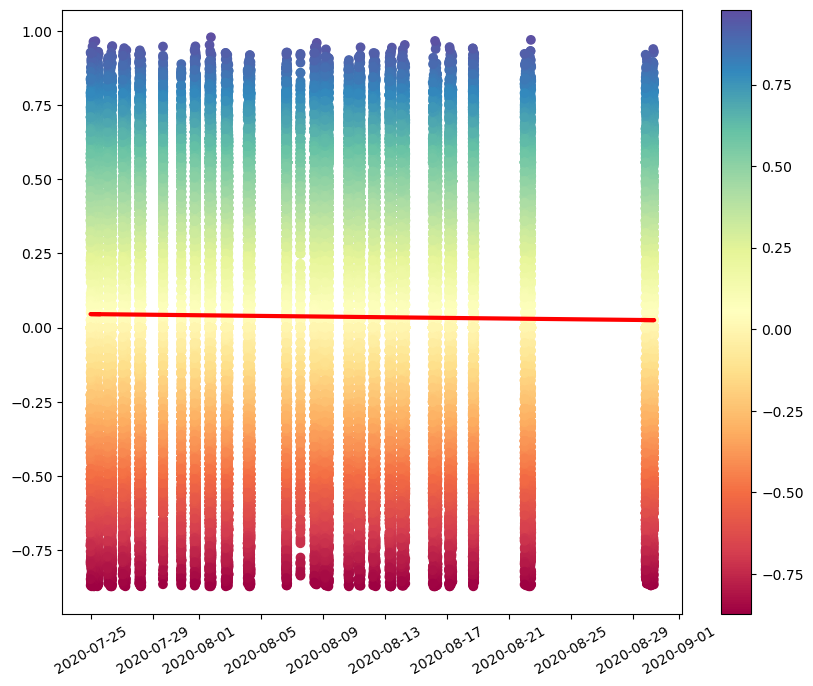

In [37]:
data['date'] =  pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')   
def to_timestamp(t):
    return datetime.timestamp(t)
data['timestamp'] = data['date'].apply(to_timestamp)

fit = stats.linregress(data['timestamp'] , data['sentiment_score'])
data['prediction'] = data['timestamp']*fit.slope + fit.intercept
print("fit.slope:",fit.slope)
#fit.slope<0, so the sentimen_score has a slight decrease during the period
print("fit.intercept",fit.intercept)
print("fit.pvalue", fit.pvalue) 
##since p value<0.05, reject H0, the ratings has been changing over time
plt.xticks(rotation = 30)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(data['date'] , data['sentiment_score'], c=data['sentiment_score'], cmap='Spectral')
plt.colorbar()
#plt.plot(data['date'] , data['sentiment_score'] , 'b.' , alpha = 0.5)
plt.plot(data['date'] , data['timestamp']*fit.slope + fit.intercept , 'r-' , linewidth =3)

(array([ 4016.,  8483.,  8249.,  7177., 44222.,  6939., 11907., 12311.,
         6657.,  2222.]),
 array([-0.91765998, -0.73186335, -0.54606672, -0.36027009, -0.17447345,
         0.01132318,  0.19711981,  0.38291644,  0.56871307,  0.7545097 ,
         0.94030634]),
 <BarContainer object of 10 artists>)

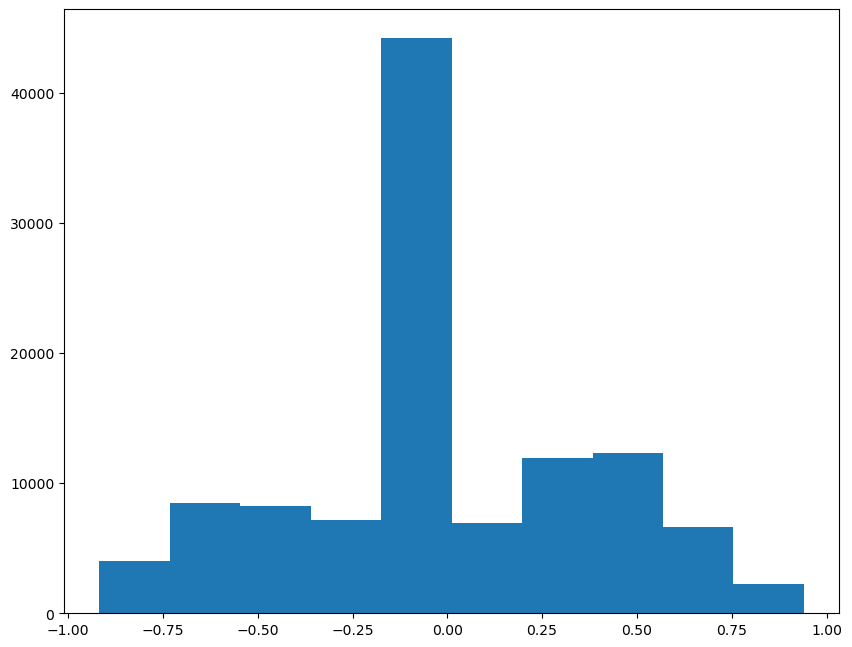

In [34]:
residuals=data['sentiment_score']-data['prediction']
plt.hist(residuals)#the requirement of normality can be softened with kind-of-normal data and n>=40

In [33]:
corr_matrix = np.corrcoef(positive_tweet['sentiment_score'], positive_tweet['prediction'])
corr = corr_matrix[0,1]
R_sq = corr**2
print("corr_matrix:")
print(corr_matrix)
print("R-square:",R_sq)
print(stats.linregress(data['timestamp'], data['sentiment_score']).rvalue)

corr_matrix:
[[1.         0.01562198]
 [0.01562198 1.        ]]
R-square: 0.00024404631882520787
-0.014861853478984008


In [ ]:
#positive
positive_tweet = data[(data['sentiment_score']>0)]
#negative
negative_tweet = data[(data['sentiment_score']<-0)]